In [1]:
import numpy as np
import pandas as pd

In [2]:
data_pm = pd.read_csv("./best_20com_9pm.csv", header=0, index_col=[0])
index = data_pm.index.tolist()
print(index)
def read_csv(path):
    return pd.read_csv(path,index_col=[0,1],header=0)
path_budget_list=["./budget"+str(i)+".csv" for i in index]
df = [read_csv(name) for name in path_budget_list]
df = pd.concat(df,axis=1)
df.columns = index
print(df.columns)
print(df)
df.to_csv("./SSGA_budget.csv",header=True,index=True)

[590, 593, 579, 588, 589, 591, 576, 587, 569, 558, 592, 572, 594, 542, 570, 562, 575, 573, 552, 555]
Int64Index([590, 593, 579, 588, 589, 591, 576, 587, 569, 558, 592, 572, 594,
            542, 570, 562, 575, 573, 552, 555],
           dtype='int64')
                   590        593        579        588        589        591  \
F1  Times1   1000099.0  1000099.0  1000199.0  1000099.0  1000099.0  1000099.0   
    Times2   1000099.0  1000099.0  1000199.0  1000099.0  1000099.0  1000099.0   
    Times3   1000099.0  1000099.0  1000199.0  1000099.0  1000099.0  1000099.0   
    Times4   1000099.0  1000099.0  1000199.0  1000099.0  1000099.0  1000099.0   
    Times5   1000099.0  1000099.0  1000199.0  1000099.0  1000099.0  1000099.0   
...                ...        ...        ...        ...        ...        ...   
F23 Times6     38103.0  1000099.0   626542.0    17817.0  1000099.0    72650.0   
    Times7     26261.0  1000099.0    26988.0    17429.0    19901.0  1000099.0   
    Times8     2804

In [3]:
data_pm = pd.read_csv("./best_20com_9pm.csv", header=0, index_col=[0])
index = data_pm.index.tolist()
print(index)
def read_csv(path):
    return pd.read_csv(path,index_col=[0,1],header=0)
path_percent_list=["./combination"+str(i)+".csv" for i in index]
df = [read_csv(name) for name in path_percent_list]
df = pd.concat(df,axis=1)
df.columns = index
print(df.columns)
print(df)
df.to_csv("./SSGA_rawdata.csv",header=True,index=True)

def percent(Function, optimal):
    dataframe = df.loc[(Function, slice(None)), :]
    dataframe = pd.DataFrame(data=dataframe.values,
                             columns=dataframe.columns)
    percent_dataframe = dataframe.applymap(lambda x: True if ((x-optimal)<=threshold or x<=optimal) else False)
    percent_dataframe["Function"] = Function
    return percent_dataframe

threshold =0.01
opt = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -418.98 * 50, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0003, -1.0316, 0.398, 3.0,
       -3.86, -3.32, -10.1532,-10.4028, -10.5363]
function_list = np.arange(1, 24, 1)
percent_df = [percent(Function="F" + str(i), optimal=opt[i - 1]) for i in function_list]
percent_df = pd.concat(percent_df, axis=0)
percent_df = percent_df.groupby(["Function"]).sum().applymap(lambda x: str(x * 10) + "%")
index = ["F" + str(i) for i in function_list]
percent_df = percent_df.loc[index]
display(percent_df)
percent_df.to_csv("./SSGA_percent.csv")

[590, 593, 579, 588, 589, 591, 576, 587, 569, 558, 592, 572, 594, 542, 570, 562, 575, 573, 552, 555]
Int64Index([590, 593, 579, 588, 589, 591, 576, 587, 569, 558, 592, 572, 594,
            542, 570, 562, 575, 573, 552, 555],
           dtype='int64')
                   590        593        579        588        589        591  \
F1  Times1    0.004679   0.001876   0.000664   0.001125   0.001367   0.002307   
    Times2    0.001970   0.001709   0.001687   0.002508   0.001485   0.002218   
    Times3    0.002223   0.002995   0.001435   0.003360   0.003198   0.002267   
    Times4    0.001532   0.001002   0.001784   0.002255   0.002512   0.002209   
    Times5    0.001561   0.002119   0.001300   0.002503   0.003188   0.002575   
...                ...        ...        ...        ...        ...        ...   
F23 Times6  -10.536204  -2.806631 -10.536249 -10.536233  -2.806631 -10.536229   
    Times7  -10.536242  -2.421734 -10.536237 -10.536244 -10.536375  -5.128481   
    Times8  -10.536

,590,593,579,588,589,591,576,587,569,558,592,572,594,542,570,562,575,573,552,555
Function,,,,,,,,,,,,,,,,,,,,
F1,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%
F2,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%
F3,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%
F4,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%
F5,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%
F6,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%
F7,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%
F8,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%
F9,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%


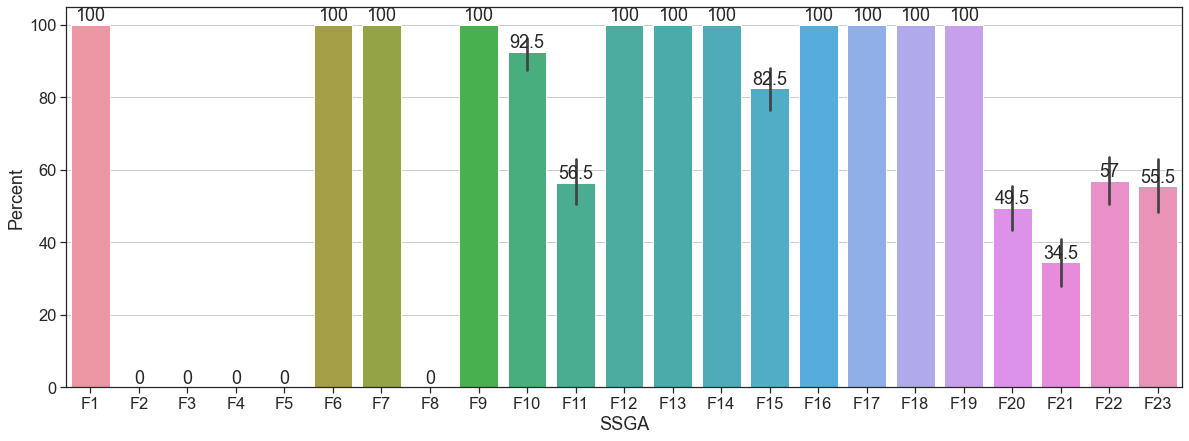

In [4]:
from matplotlib import pyplot as plt
dataframe = percent_df.copy()
dataframe = dataframe.applymap(lambda x:x if not '%' in str(x) else x.replace('%',''))
# display(dataframe)
import seaborn as sns
dataframe = dataframe.stack()
# display(dataframe)
dataframe = dataframe.rename_axis(index=["Function","Combinations"])
dataframe = dataframe.reset_index(level=[0, 1], name="Percent")
dataframe["Percent"] = pd.to_numeric(dataframe["Percent"])
dataframe = dataframe.reset_index(drop=False)
# display(dataframe)
function_list = ["F" + str(i) for i in range(1, 24, 1)]
def show_graph(dataframe):
    sns.set_theme(style="whitegrid", palette="pastel",font_scale=1.5)
    sns.set_style("ticks",{'axes.grid' : True})
    plt.figure(figsize=(20,7))
    plt.subplot(1,1,1)
    ax=sns.barplot(data=dataframe,y="Percent",x="Function",ci=95)
    ax.bar_label(ax.containers[0],label_type='edge')
    plt.xlabel("SSGA")
    # sns.move_legend(ax, "upper left", bbox_to_anchor=(0, 1))
    plt.savefig("./SSGA_percent.png", dpi=1200, bbox_inches='tight')
    plt.show()
show_graph(dataframe=dataframe)

In [5]:
# from matplotlib import pyplot as plt
# dataframe = df.copy()
# dataframe = dataframe.stack()
# # display(dataframe)
# dataframe = dataframe.rename_axis(index=["Function","Times","Combinations"])
# dataframe = dataframe.reset_index(level=[0, 1], name="Solutions")
# dataframe["Solutions"] = pd.to_numeric(dataframe["Solutions"])
# dataframe = dataframe.reset_index(drop=False)
# # display(dataframe)
# opt = [0, 0, 0, 0, 0, 0, 0, -20949, 0, 0, 0, 0, 0, 1, 0.0003, -1.0316, 0.398, 3, -3.86, -3.32,-10.1532, -10.4028, -10.5363]
# def show_graph(dataframe):
#     sns.set_theme(style="whitegrid", palette="pastel",font_scale=1.5)
#     dist_cols = 3
#     dist_rows = 8
#     plt.figure(figsize=(7 * dist_cols, 4 * dist_rows))
#     i = 1
#     for function in function_list:
#         dataf = dataframe[dataframe["Function"] == function]
#         plt.subplot(dist_rows, dist_cols, i)
#         ax=sns.boxplot(data=dataf, y="Solutions",palette="viridis",x="Function",hue="Function",width=0.2)
#         sns.move_legend(ax, "upper left", bbox_to_anchor=(0, 1),frameon=False)
#         plt.axhline(y=opt[i-1],color="red")
#         plt.xlabel("")
#         plt.ylabel("Solutions")
#         i = i + 1
#     plt.savefig("./boxplot_SSGA.png", dpi=1200, bbox_inches='tight')
#     plt.show()
# show_graph(dataframe=dataframe)